In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from scipy.stats import f
from scipy.stats import norm
import math

In [2]:
# Load and preprocess data
data = pd.read_csv("/content/final.csv")
data.head()

,age,sex,bmi,smoker,region,charges
0,63,female,23.085,no,northeast,14451.83515
1,55,female,32.775,no,northwest,12268.63225
2,23,male,17.385,no,northwest,2775.19215
3,31,male,36.300,yes,southwest,38711.00000
4,22,male,35.600,yes,southwest,35585.57600


In [3]:
data.shape

(1338, 6)

In [4]:
data.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   sex      1338 non-null   object 
 2   bmi      1338 non-null   float64
 3   smoker   1338 non-null   object 
 4   region   1338 non-null   object 
 5   charges  1338 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 62.8+ KB


In [6]:
data.isnull().mean() * 100


,0
age,0.0
sex,0.0
bmi,0.0
smoker,0.0
region,0.0
charges,0.0


In [7]:
data_encoded = pd.get_dummies(data[["sex", "smoker", "region"]], drop_first=True)
numerical_data = data.drop(["sex", "smoker", "region"], axis=1)
processed_data = pd.concat([numerical_data, data_encoded], axis=1)
processed_data.head()

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,63,23.085,14451.83515,False,False,False,False,False
1,55,32.775,12268.63225,False,False,True,False,False
2,23,17.385,2775.19215,True,False,True,False,False
3,31,36.300,38711.00000,True,True,False,False,True
4,22,35.600,35585.57600,True,True,False,False,True


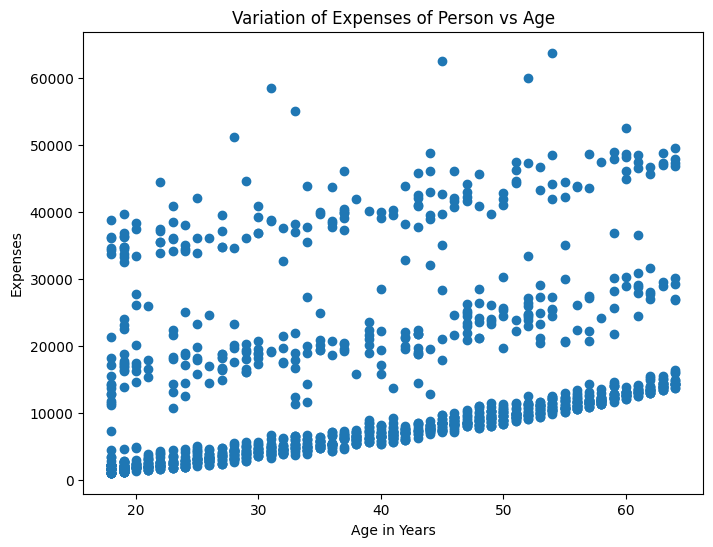

In [8]:
# Visualize data
plt.figure(figsize=(8, 6))
plt.title("Variation of Expenses of Person vs Age")
plt.scatter(numerical_data["age"], numerical_data["charges"])
plt.ylabel("Expenses")
plt.xlabel("Age in Years")
plt.show()

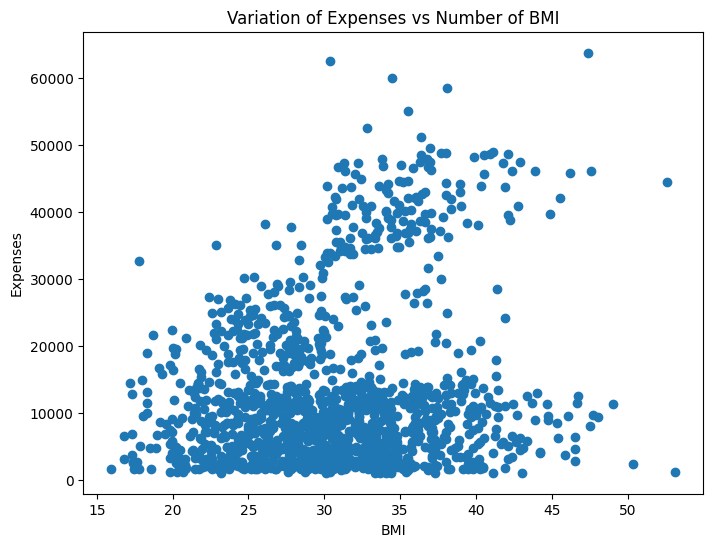

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Variation of Expenses vs Number of BMI")
plt.scatter(numerical_data["bmi"], numerical_data["charges"])
plt.ylabel("Expenses")
plt.xlabel("BMI")
plt.show()

C:\Users\Uday Om\AppData\Local\Temp\ipykernel_12788\1598700723.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[data["region"]=="southwest"]["charges"].values,


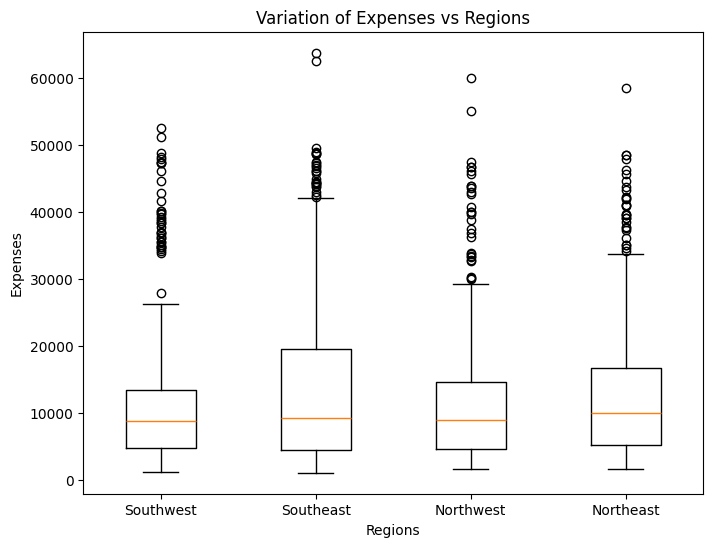

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Variation of Expenses vs Regions")
plt.boxplot([data[data["region"]=="southwest"]["charges"].values,
             data[data["region"]=="southeast"]["charges"].values,
             data[data["region"]=="northwest"]["charges"].values,
             data[data["region"]=="northeast"]["charges"].values],
             labels=["Southwest", "Southeast", "Northwest", "Northeast"])
plt.ylabel("Expenses")
plt.xlabel("Regions")
plt.show()

C:\Users\Uday Om\AppData\Local\Temp\ipykernel_12788\320159828.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[data["smoker"] == "yes"]["charges"].values,


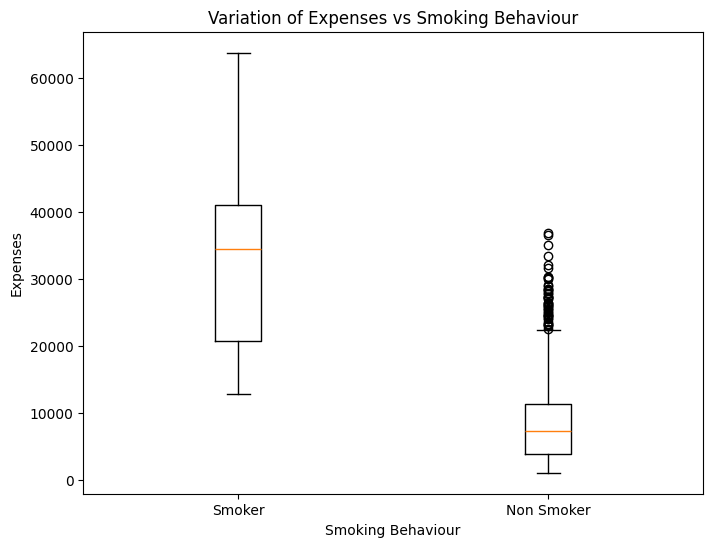

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Variation of Expenses vs Smoking Behaviour")
plt.boxplot([data[data["smoker"] == "yes"]["charges"].values,
            data[data["smoker"] == "no"]["charges"].values],
            labels=["Smoker","Non Smoker"])
plt.ylabel("Expenses")
plt.xlabel("Smoking Behaviour")
plt.show()

<ipython-input-10-3db13100f9ae>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt. boxplot([data[data["sex"] == "male"]["charges"].values,


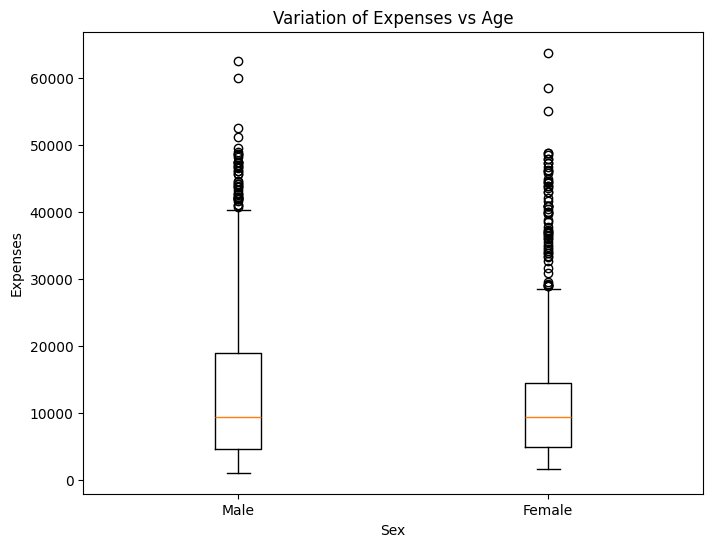

In [10]:
plt.figure(figsize=(8, 6))
plt.title("Variation of Expenses vs Age")
plt. boxplot([data[data["sex"] == "male"]["charges"].values,
             data[data["sex"] == "female"]["charges"].values],
             labels=["Male", "Female"])
plt.ylabel("Expenses")
plt.xlabel("Sex")
plt.show()

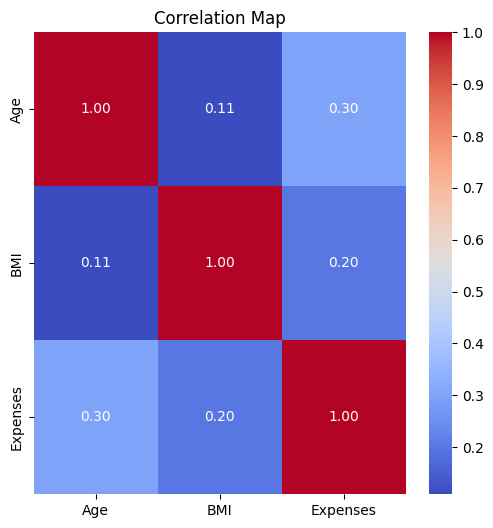

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(data[["age", "bmi", "charges"]].corr().values, annot=True,
            fmt=".2f", cmap="coolwarm",
            xticklabels=["Age", "BMI", "Expenses"],
            yticklabels=["Age", "BMI", "Expenses"])
plt.title("Correlation Map")
plt.show()

In [ ]:
# Linear regression analysis
predictor_columns = ['age', 'bmi', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
X = np.concatenate([np.ones((processed_data.shape[0], 1)), processed_data[predictor_columns].values], axis=1)
y = processed_data["charges"].values

# Statistical Analysis of Linear Regression Model

## Model Formulation
The linear regression model is formulated as:
$y = X\beta + \epsilon$

where:
- $y$ is the vector of insurance charges (dependent variable)
- $X$ is the design matrix containing predictors (age, BMI, sex, smoking status, region)
- $\beta$ is the vector of regression coefficients
- $\epsilon$ is the error term, assumed to follow $N(0,\sigma^2)$

## Parameter Estimation
The coefficients are estimated using Ordinary Least Squares (OLS):
$\hat{\beta} = (X'X)^{-1}X'y$

The error variance is estimated as:
$\hat{\sigma}^2 = \frac{\sum(y_i - \hat{y}_i)^2}{n-p}$
where n is sample size and p is number of parameters

## Statistical Tests and Metrics

### Coefficient Significance
For each coefficient $\beta_j$:
- t-statistic: $t_j = \frac{\hat{\beta}_j}{\sqrt{\hat{\sigma}^2C_{jj}}}$
- Confidence Interval: $\hat{\beta}_j \pm t_{\alpha/2,n-p}\sqrt{\hat{\sigma}^2C_{jj}}$
where $C_{jj}$ is the j-th diagonal element of $(X'X)^{-1}$

### Model Fit Measures
- Sum of Squared Errors (SSE): $\sum(y_i - \hat{y}_i)^2$
- Sum of Squares Regression (SSR): $\sum(\hat{y}_i - \bar{y})^2$
- Total Sum of Squares (TSS): $\sum(y_i - \bar{y})^2$
- Adjusted R²: $1 - \frac{SSE/(n-p)}{TSS/(n-1)}$
- F-statistic: $\frac{SSR/(p-1)}{SSE/(n-p)}$

### Residual Analysis
- Raw residuals: $e_i = y_i - \hat{y}_i$
- Studentized residuals: $r_i = \frac{e_i}{\hat{\sigma}\sqrt{1-h_{ii}}}$
where $h_{ii}$ are leverage values (diagonal elements of hat matrix)

The code implements these calculations to evaluate:
1. Overall model significance (F-test)
2. Individual coefficient significance (t-tests)
3. Model fit quality (R², error metrics)
4. Residual diagnostics for outlier detection


In [ ]:
# Set significance level and define prediction point
alpha = 0.05
x0 = np.concatenate([[1], processed_data.iloc[450, 1:].values])
t_right = t.ppf(q=1-alpha/2, df=X.shape[0]-X.shape[1])
t_left = t.ppf(q=alpha/2, df=X.shape[0]-X.shape[1])
f_right = f.ppf(q=1-alpha, dfn=X.shape[1]-1, dfd=X.shape[0]-X.shape[1])

# Model fitting
C = np.linalg.inv(np.dot(np.transpose(X.astype(float)), X.astype(float)))
Px = np.dot(np.dot(X, C), np. transpose(X) )
beta = np.dot(C, np.dot(np.transpose(X), y) )
y_pred = np.dot(X, beta)


#C = np.linalg.inv(X.T @ X)
#beta = C @ X.T @ y
#y_pred = X @ beta
residuals = y - y_pred
error_variance = np.sum(residuals**2) / (X.shape[0] - X.shape[1])


t_values = beta / np.sqrt(np.diag(C) * error_variance)
#beta_confidence_intervals = np.zeros((beta. shape[0], 2), dtype=np. float32)
#for j in range(0, beta.shape[0]):
 #   beta - t_right * np.sqrt(np.diag(C) * error_variance),
  #  beta - t_left * np.sqrt(np.diag(C) * error_variance)
for i in range(0,beta.shape[0]):
  t_values[i]=beta[i]/np.sqrt(error_variance*C[i, i])

beta_confidence_intervals = np.zeros((beta. shape[0], 2), dtype=np. float32)
for j in range(0, beta.shape[0]):
    beta_confidence_intervals[j, 0] = beta[j] - t_right*np.sqrt(error_variance*C[j, j])
    beta_confidence_intervals[j, 1] = beta[j] - t_left*np.sqrt(error_variance*C[j, j])

# Print summary
print("*************** " + "Summary" + " ***************\n")
print("The Model is - ")
print("charges" + " = " + " + ".join(predictor_columns) + "\n")
print("SSE of the given Model:", round(np.sum(residuals**2), 2), "\n")
print("SSR of the given Model:", round(np.sum((y_pred - np.mean(y))**2), 2), "\n")
print("TSS of the given Model:", round(np.sum((y - np.mean(y))**2), 2), "\n")
print("Adjusted R2 for the given Model:", round(1 - (np.sum(residuals**2) / np.sum((y - np.mean(y))**2)), 2), "\n")
print("\"S\" is:", round(error_variance, 2), "\n")
print("MSR of the given Model:", round(np.sum((y_pred - np.mean(y))**2) / (X.shape[1] - 1), 2), "\n")
print("\"MSE of the given Model\":", round(np.sum(residuals**2) / (X.shape[0] - X.shape[1]), 2))
print("\"The F stat for the Model Fit:\":", round((np.sum((y_pred - np.mean(y))**2) / (X.shape[1] - 1)) / (np.sum(residuals**2) / (X.shape[0] - X.shape[1])), 2))
print("===========================\n")
print("Beta estimates-\n")
beta_heading = list()
for i in range(0, beta.shape[0]):
    beta_heading.append(str("beta")+str(i))
X_nn = X.astype(float)
dict1 ={
    "Coefficients":beta_heading,
    "Beta Est.":beta,
    "t-stat":t_values,
    "p-values":2 * t.pdf(t_values.astype(float), df =float(X_nn.shape[0]-X_nn.shape[1])),
    "Lower Conf":beta_confidence_intervals.T[0],
    "Upper Conf":beta_confidence_intervals.T[1]
}


# # Residual plot
# plt.scatter(y_pred, residuals)
# plt.plot([min(y_pred), max(y_pred) + 2], [0, 0], color="g")
# plt.xlabel("Predicted Values")
# plt.ylabel("Error")
# plt.title("Residual Plot with Predicted Values")
# plt.show()

# Studentized error analysis
stand_res = np.zeros(X.shape[0], dtype=np. float32)
for i in range(0, X.shape[0]):
    stand_res[i] = residuals[i]/np. sqrt(error_variance*(1-Px[i, i]))

In = np.eye(Px.shape[0])
SSE = np.dot (np. transpose(y), np.dot(In-Px, y) )
te_values= np. zeros(X. shape[0], dtype=np. float32)
for i in range(0, X.shape[0]):
    sigma_2i = (SSE-np.square(residuals[i])/(1-Px[i, i]) )*(1/(X. shape[0]-X. shape[1]))
    te_values[i] = residuals[i]/np. sqrt(sigma_2i*(1-Px[i, i]))


for i in dict1.keys():
  print(i, end = '\t\t\t')
print('')
for i in range(len(beta_heading)):
  for k in dict1.keys():
    print(dict1[k][i], end = '\t\t\t')
  print('')

*************** Summary ***************

The Model is - 
charges = age + bmi + sex_male + smoker_yes + region_northwest + region_southeast + region_southwest

SSE of the given Model: 49277079458.27 

SSR of the given Model: 146797142110.1 

TSS of the given Model: 196074221568.37 

Adjusted R2 for the given Model: 0.75 

"S" is: 37050435.68 

MSR of the given Model: 20971020301.44 

"MSE of the given Model": 37050435.68
"The F stat for the Model Fit:": 566.01

Beta estimates-

Coefficients			Beta Est.			t-stat			p-values			Lower Conf			Upper Conf			
beta0			-11556.957344441866			-11.725497432333087			2.9505064450336325e-29			-13490.509			-9623.406			
beta1			258.5396974787274			21.657793317624456			3.9106158926046665e-88			235.12134			281.95807			
beta2			340.4591811730802			11.856851590760767			7.251979625457992e-30			284.12927			396.7891			
beta3			-111.57001333518137			-0.3337837295398538			0.7544813942038101			-767.30115			544.16113			
beta4			23862.906341611935			57.52554255067425

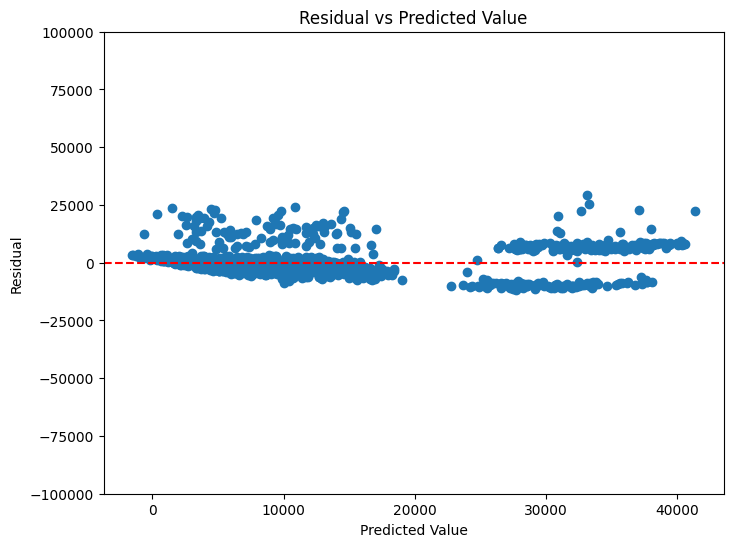

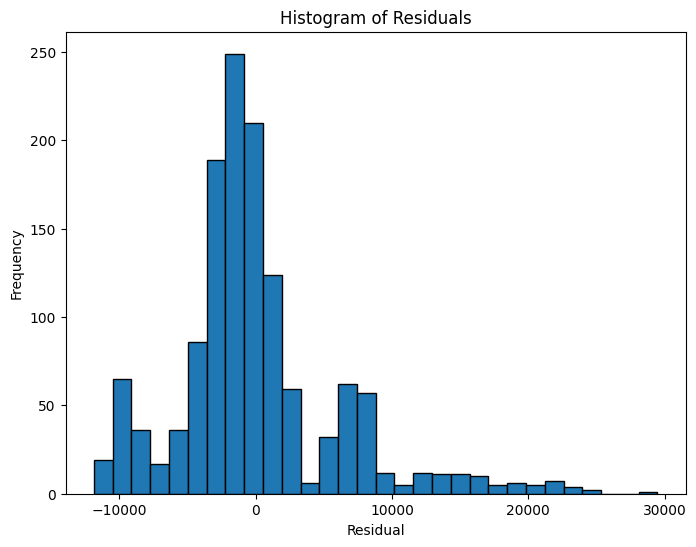

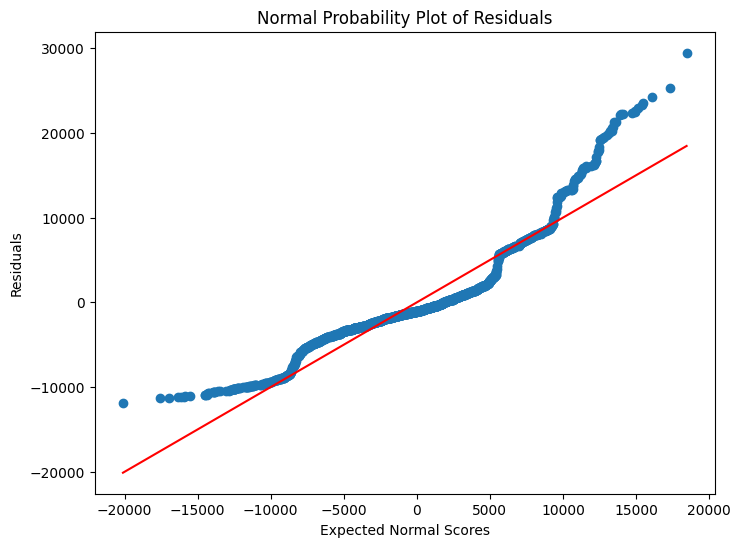

C:\Users\Uday Om\AppData\Local\Temp\ipykernel_12788\2370515947.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


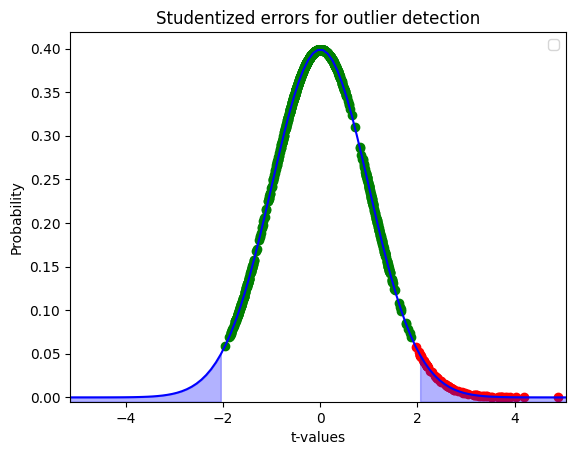

*************** Summary ***************

The Model is -

charges = age + bmi + smoker_yes + region_northwest + region_southeast + region_southwest

SSE of the given Model: 49281207305.77 

SSR of the given Model: 146793014262.59 

TSS of the given Model: 196074221568.37 

Adjusted R2 for the given Model: 0.75 

"S" is: 37025700.46 

MSR of the given Model: 24465502377.1 

"MSE of the given Model": 37025700.46
"The F stat for the Model Fit:": 660.77

Beta estimates-

Coefficients			Beta Est.			t-stat			p-values			Lower Conf			Upper Conf			
beta0			-11601.56040898201			-11.884413733467554			5.380549507605378e-30			-13516.618			-9686.503			
beta1			258.6365198333136			21.679541364819922			2.703379295323449e-88			235.23291			282.04013			
beta2			340.00763169736354			11.85824853617073			7.126908838365362e-30			283.7591			396.25616			
beta3			23852.484739337822			57.683248019269264			0.0			23041.287			24663.684			
beta4			-303.520725700806			-0.6351793839237957			0.651924464473287			-1240.94

In [ ]:
residual = y - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

# Setting the y-limits
plt.ylim(-100000,100000)

plt.title('Residual vs Predicted Value')
plt.show()


plt.figure(figsize=(8, 6))
plt.hist(residual, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Calculate the variance of residuals
variance = np.var(residual)

# Calculate the expected normal scores
expected_normal_scores = np.sort(np.random.normal(0, math.sqrt(variance), len(residual)))

# Sort the residuals
sorted_residuals = np.sort(residual)

# Plot the normal probability plot of the residuals
plt.figure(figsize=(8, 6))
plt.scatter(expected_normal_scores, sorted_residuals)
plt.plot(expected_normal_scores, expected_normal_scores, color='r')
plt.xlabel("Expected Normal Scores")
plt.ylabel("Residuals")
plt.title("Normal Probability Plot of Residuals")
plt.show()


x_p = np.arange(1.05*min(te_values.min(), -te_values.max()), 1.05*te_values.max(), 0.1)
y_p= t.pdf(x_p, df=X.shape[0] - X.shape[1])
#y_p2 = norm.pdf(x_p)

plt.scatter(te_values[(t_left<=te_values)& (te_values <= t_right)], t.pdf(te_values[(t_left<=te_values)& (te_values <= t_right)], df= X.shape[0]- X.shape[1]), color="g")

plt.scatter(te_values[(t_left > te_values) | (te_values > t_right)], t.pdf(te_values[(t_left > te_values) | (te_values > t_right)], df=X.shape[0] - X.shape[1]), color="r")



plt.plot(x_p, y_p, color='b')
plt.autoscale(axis='x', tight=True)
plt.ylim(bottom=-.005)
plt.ylabel("Probability")
plt.xlabel("t-values")
plt.title("Studentized errors for outlier detection")
plt.fill_between(x_p[x_p<t_left], t.pdf(x_p[x_p<t_left],df= X.shape[0]- X.shape[1]), -0.005, alpha=0.3, color='b')
plt.fill_between(x_p[x_p>t_right], t.pdf(x_p[x_p>t_right],df= X.shape[0]- X.shape[1]), -0.005, alpha=0.3, color='b')
plt.legend()
plt.show()




# Linear regression analysis
#Dropping sex_male feature
predictor_columns = ['age', 'bmi', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
target_variable = processed_data. columns [2]
X = np.concatenate([np.ones((processed_data.shape[0], 1)), processed_data[predictor_columns].values], axis=1)
y = processed_data[target_variable].values

# Set significance level and define prediction point
alpha = 0.05
x0 = np.concatenate([[1], processed_data.iloc[450, 1:].values])
t_right = t.ppf(q=1-alpha/2, df=X.shape[0]-X.shape[1])
t_left = t.ppf(q=alpha/2, df=X.shape[0]-X.shape[1])
f_right = f.ppf(q=1-alpha, dfn=X.shape[1]-1, dfd=X.shape[0]-X.shape[1])

# Model fitting
C = np.linalg.inv(np.dot(np.transpose(X.astype(float)), X.astype(float)))
Px = np.dot(np.dot(X, C), np. transpose(X) )
beta = np.dot(C, np.dot(np.transpose(X), y) )
y_pred = np.dot(X, beta)


#C = np.linalg.inv(X.T @ X)
#beta = C @ X.T @ y
#y_pred = X @ beta
residuals = y - y_pred
error_variance = np.sum(residuals**2) / (X.shape[0] - X.shape[1])


t_values = beta / np.sqrt(np.diag(C) * error_variance)
#beta_confidence_intervals = np.zeros((beta. shape[0], 2), dtype=np. float32)
#for j in range(0, beta.shape[0]):
 #   beta - t_right * np.sqrt(np.diag(C) * error_variance),
  #  beta - t_left * np.sqrt(np.diag(C) * error_variance)
for i in range(0,beta.shape[0]):
  t_values[i]=beta[i]/np.sqrt(error_variance*C[i, i])

beta_confidence_intervals = np.zeros((beta. shape[0], 2), dtype=np. float32)
for j in range(0, beta.shape[0]):
    beta_confidence_intervals[j, 0] = beta[j] - t_right*np.sqrt(error_variance*C[j, j])
    beta_confidence_intervals[j, 1] = beta[j] - t_left*np.sqrt(error_variance*C[j, j])

# Print summary
print("*************** " + "Summary" + " ***************\n")
print("The Model is -\n")
print(target_variable + " = " + " + ".join(predictor_columns) + "\n")
print("SSE of the given Model:", round(np.sum(residuals**2), 2), "\n")
print("SSR of the given Model:", round(np.sum((y_pred - np.mean(y))**2), 2), "\n")
print("TSS of the given Model:", round(np.sum((y - np.mean(y))**2), 2), "\n")
print("Adjusted R2 for the given Model:", round(1 - (np.sum(residuals**2) / np.sum((y - np.mean(y))**2)), 2), "\n")
print("\"S\" is:", round(error_variance, 2), "\n")
print("MSR of the given Model:", round(np.sum((y_pred - np.mean(y))**2) / (X.shape[1] - 1), 2), "\n")
print("\"MSE of the given Model\":", round(np.sum(residuals**2) / (X.shape[0] - X.shape[1]), 2))
print("\"The F stat for the Model Fit:\":", round((np.sum((y_pred - np.mean(y))**2) / (X.shape[1] - 1)) / (np.sum(residuals**2) / (X.shape[0] - X.shape[1])), 2))
print("===========================\n")
print("Beta estimates-\n")
beta_heading = list()
for i in range(0, beta.shape[0]):
    beta_heading.append(str("beta")+str(i))
X_nn = X.astype(float)
dict1 ={
    "Coefficients":beta_heading,
    "Beta Est.":beta,
    "t-stat":t_values,
    "p-values":2 * t.pdf(t_values.astype(float), df =float(X_nn.shape[0]-X_nn.shape[1])),
    "Lower Conf":beta_confidence_intervals.T[0],
    "Upper Conf":beta_confidence_intervals.T[1]
}


# # Residual plot
# plt.scatter(y_pred, residuals)
# plt.plot([min(y_pred), max(y_pred) + 2], [0, 0], color="g")
# plt.xlabel("Predicted Values")
# plt.ylabel("Error")
# plt.title("Residual Plot with Predicted Values")
# plt.show()

# Studentized error analysis
stand_res = np.zeros(X.shape[0], dtype=np. float32)
for i in range(0, X.shape[0]):
    stand_res[i] = residuals[i]/np. sqrt(error_variance*(1-Px[i, i]))

In = np.eye(Px.shape[0])
SSE = np.dot (np. transpose(y), np.dot(In-Px, y) )
te_values= np. zeros(X. shape[0], dtype=np. float32)
for i in range(0, X.shape[0]):
    sigma_2i = (SSE-np.square(residuals[i])/(1-Px[i, i]) )*(1/(X. shape[0]-X. shape[1]))
    te_values[i] = residuals[i]/np. sqrt(sigma_2i*(1-Px[i, i]))


for i in dict1.keys():
  print(i, end = '\t\t\t')
print('')
for i in range(len(beta_heading)):
  for k in dict1.keys():
    print(dict1[k][i], end = '\t\t\t')
  print('')



# Linear regression analysis
#Dropping sex_male, regions features
predictor_columns = ['age', 'bmi', 'smoker_yes']
target_variable = processed_data. columns [2]
X = np.concatenate([np.ones((processed_data.shape[0], 1)), processed_data[predictor_columns].values], axis=1)
y = processed_data[target_variable].values

# Set significance level and define prediction point
alpha = 0.05
x0 = np.concatenate([[1], processed_data.iloc[450, 1:].values])
t_right = t.ppf(q=1-alpha/2, df=X.shape[0]-X.shape[1])
t_left = t.ppf(q=alpha/2, df=X.shape[0]-X.shape[1])
f_right = f.ppf(q=1-alpha, dfn=X.shape[1]-1, dfd=X.shape[0]-X.shape[1])

# Model fitting
C = np.linalg.inv(np.dot(np.transpose(X.astype(float)), X.astype(float)))
Px = np.dot(np.dot(X, C), np. transpose(X) )
beta = np.dot(C, np.dot(np.transpose(X), y) )
y_pred = np.dot(X, beta)


#C = np.linalg.inv(X.T @ X)
#beta = C @ X.T @ y
#y_pred = X @ beta
residuals = y - y_pred
error_variance = np.sum(residuals**2) / (X.shape[0] - X.shape[1])


t_values = beta / np.sqrt(np.diag(C) * error_variance)
#beta_confidence_intervals = np.zeros((beta. shape[0], 2), dtype=np. float32)
#for j in range(0, beta.shape[0]):
 #   beta - t_right * np.sqrt(np.diag(C) * error_variance),
  #  beta - t_left * np.sqrt(np.diag(C) * error_variance)
for i in range(0,beta.shape[0]):
  t_values[i]=beta[i]/np.sqrt(error_variance*C[i, i])

beta_confidence_intervals = np.zeros((beta. shape[0], 2), dtype=np. float32)
for j in range(0, beta.shape[0]):
    beta_confidence_intervals[j, 0] = beta[j] - t_right*np.sqrt(error_variance*C[j, j])
    beta_confidence_intervals[j, 1] = beta[j] - t_left*np.sqrt(error_variance*C[j, j])

# Print summary
print("*************** " + "Summary" + " ***************\n")
print("The Model is -\n")
print(target_variable + " = " + " + ".join(predictor_columns) + "\n")
print("SSE of the given Model:", round(np.sum(residuals**2), 2), "\n")
print("SSR of the given Model:", round(np.sum((y_pred - np.mean(y))**2), 2), "\n")
print("TSS of the given Model:", round(np.sum((y - np.mean(y))**2), 2), "\n")
print("Adjusted R2 for the given Model:", round(1 - (np.sum(residuals**2) / np.sum((y - np.mean(y))**2)), 2), "\n")
print("\"S\" is:", round(error_variance, 2), "\n")
print("MSR of the given Model:", round(np.sum((y_pred - np.mean(y))**2) / (X.shape[1] - 1), 2), "\n")
print("\"MSE of the given Model\":", round(np.sum(residuals**2) / (X.shape[0] - X.shape[1]), 2))
print("\"The F stat for the Model Fit:\":", round((np.sum((y_pred - np.mean(y))**2) / (X.shape[1] - 1)) / (np.sum(residuals**2) / (X.shape[0] - X.shape[1])), 2))
print("===========================\n")
print("Beta estimates-\n")
beta_heading = list()
for i in range(0, beta.shape[0]):
    beta_heading.append(str("beta")+str(i))
X_nn = X.astype(float)
dict1 ={
    "Coefficients":beta_heading,
    "Beta Est.":beta,
    "t-stat":t_values,
    "p-values":2 * t.pdf(t_values.astype(float), df =float(X_nn.shape[0]-X_nn.shape[1])),
    "Lower Conf":beta_confidence_intervals.T[0],
    "Upper Conf":beta_confidence_intervals.T[1]
}


# # Residual plot
# plt.scatter(y_pred, residuals)
# plt.plot([min(y_pred), max(y_pred) + 2], [0, 0], color="g")
# plt.xlabel("Predicted Values")
# plt.ylabel("Error")
# plt.title("Residual Plot with Predicted Values")
# plt.show()

# Studentized error analysis
stand_res = np.zeros(X.shape[0], dtype=np. float32)
for i in range(0, X.shape[0]):
    stand_res[i] = residuals[i]/np. sqrt(error_variance*(1-Px[i, i]))

In = np.eye(Px.shape[0])
SSE = np.dot (np. transpose(y), np.dot(In-Px, y) )
te_values= np. zeros(X. shape[0], dtype=np. float32)
for i in range(0, X.shape[0]):
    sigma_2i = (SSE-np.square(residuals[i])/(1-Px[i, i]) )*(1/(X. shape[0]-X. shape[1]))
    te_values[i] = residuals[i]/np. sqrt(sigma_2i*(1-Px[i, i]))


for i in dict1.keys():
  print(i, end = '\t\t\t')
print('')
for i in range(len(beta_heading)):
  for k in dict1.keys():
    print(dict1[k][i], end = '\t\t\t')
  print('')

# Testing Alternative Regularization Methods: Lasso and Ridge Regression

After performing our initial linear regression analysis, we now explore two regularization techniques to potentially improve our model and test the robustness of our findings:

1. **Lasso Regression (L1 Regularization)**
   - Adds penalty term $\alpha \sum_{j=1}^{p} |\beta_j|$ to the loss function
   - Can perform feature selection by shrinking some coefficients exactly to zero
   - Helps identify most important predictors of insurance charges

2. **Ridge Regression (L2 Regularization)**
   - Adds penalty term $\alpha \sum_{j=1}^{p} \beta_j^2$ to the loss function
   - Shrinks coefficients towards zero but not exactly to zero
   - Helps handle multicollinearity between predictors

We will:
- Compare coefficients between Lasso and Ridge models
- Examine how coefficients change with different regularization strengths ($\alpha$ values)
- Visualize regularization paths to understand variable importance
- Assess which predictors remain significant under regularization

This analysis will help validate our earlier findings and potentially identify the most robust predictors of insurance charges.


Lasso model coefficients:
intercept: 0.0
age: 258.5452291520028
bmi: 340.23916542893625
sex_male: -107.08502692990875
smoker_yes: 23856.35680274375
region_northwest: -287.65288043996605
region_southeast: -1021.9369075024787
region_southwest: -899.748974352624


Ridge model coefficients:
intercept: 0.0
age: 258.4798344410972
bmi: 340.21345571549244
sex_male: -104.5278709400836
smoker_yes: 23752.489119229696
region_northwest: -299.3629625612803
region_southeast: -1023.8328379504809
region_southwest: -909.5080599917541




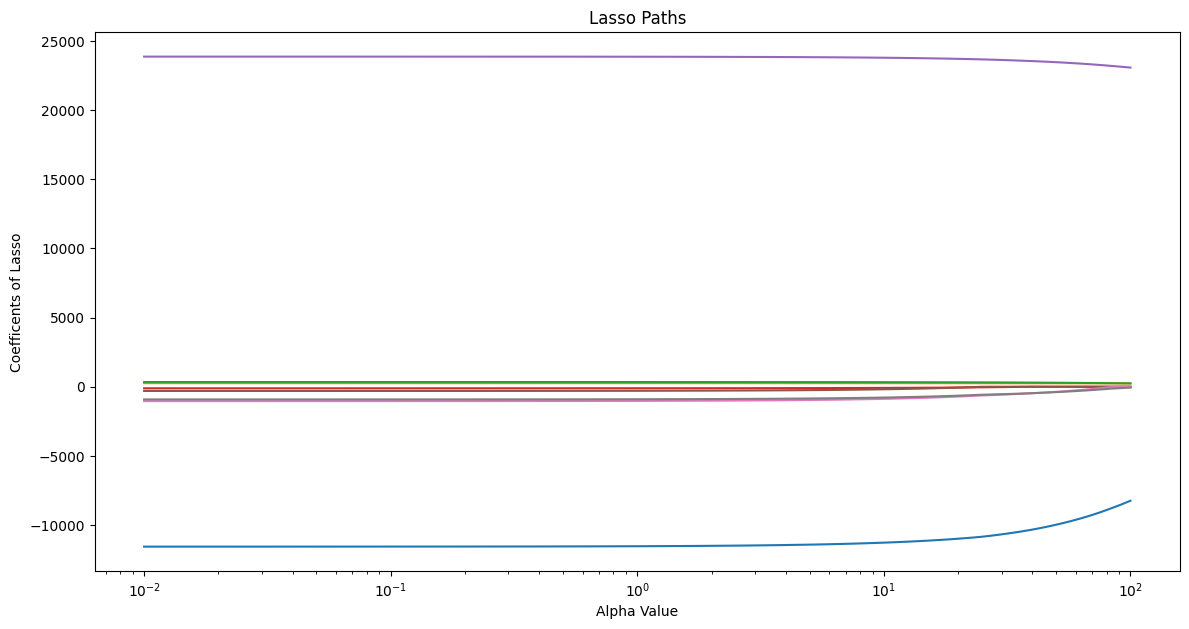

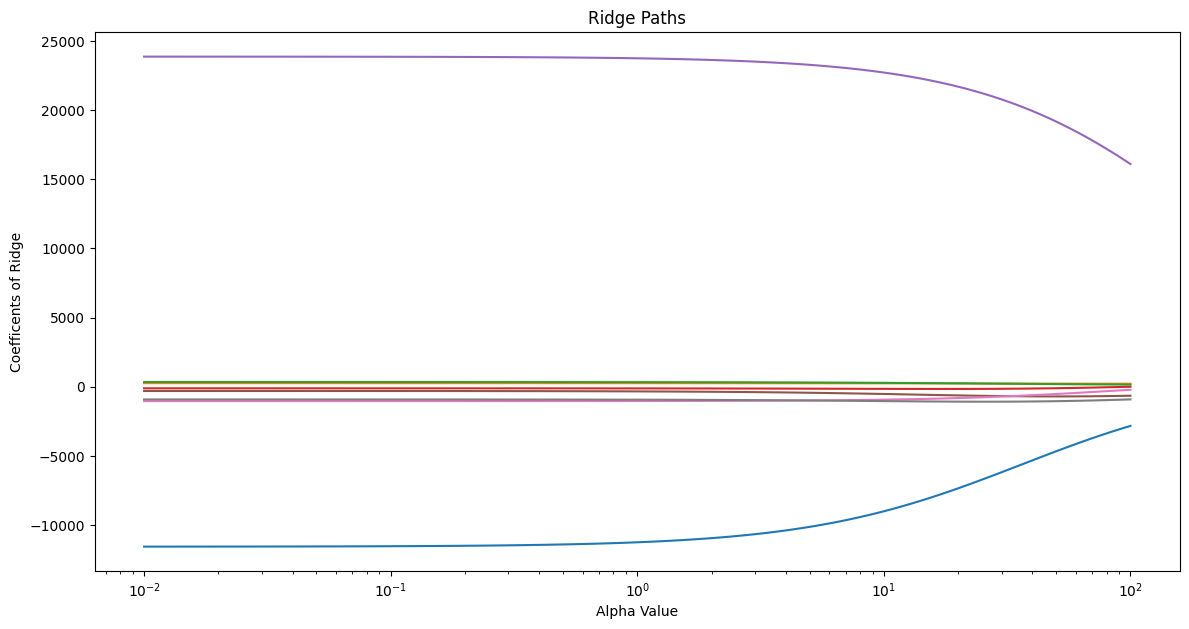

In [ ]:
data = pd.read_csv("final.csv")
# Creating dummy variables
dummy = pd.get_dummies(data[["sex", "smoker", "region"]], drop_first=True)

# Dropping original columns and adding dummy ones
data.drop(["sex", "smoker", "region"], axis=1, inplace=True)
data = pd.concat([data, dummy], axis=1)

# print(data)

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# We need to separate our predictors (X) and target/dependent variable (y)
X_new = data.drop("charges", axis=1).values
y_new = data["charges"].values

# You need to add a bias term (intercept) manually for sklearn linear models:
X_new = np.concatenate((np.ones((X_new.shape[0], 1)), X_new), axis=1)

# Define the models
Lasso_model = Lasso()
Ridge_model = Ridge()

# Train the models
Lasso_model.fit(X_new, y_new)
Ridge_model.fit(X_new, y_new)

# Outputting the coefficients from the Lasso model
print("Lasso model coefficients:")
for i, name in enumerate(['intercept'] + data.drop("charges", axis=1).columns.tolist()):
    print(f"{name}: {Lasso_model.coef_[i]}")

print("\n")

# Outputting the coefficients from the Ridge model
print("Ridge model coefficients:")
for i, name in enumerate(['intercept'] + data.drop("charges", axis=1).columns.tolist()):
    print(f"{name}: {Ridge_model.coef_[i]}")

print("\n")

# Generating a range of alpha values
alpha_values = np.logspace(-2, 2, 100)

# Initializing lists to hold the coefficients of the models for each alpha value
lasso_coeffs = []
ridge_coeffs = []

# For each alpha value in the list of alpha values
for alpha in alpha_values:
    # Create a Lasso model
    lasso = Lasso(alpha=alpha, fit_intercept=False)

    # Train the Lasso model
    lasso.fit(X_new, y_new)

    # Append the coefficients of the Lasso model to the list of Lasso coeffs.
    lasso_coeffs.append(lasso.coef_)

    # Create a Ridge model
    ridge = Ridge(alpha=alpha, fit_intercept=False)

    # Train the Ridge model
    ridge.fit(X_new, y_new)

    # Append the coefficients of the Ridge model to the list of Ridge coeffs.
    ridge_coeffs.append(ridge.coef_)

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(alpha_values, lasso_coeffs)
plt.xscale('log')
plt.title('Lasso Paths')
plt.xlabel('Alpha Value')
plt.ylabel('Coefficents of Lasso')
plt.axis('tight')
plt.show()

plt.figure(figsize=(14, 7))

plt.plot(alpha_values, ridge_coeffs)
plt.xscale('log')
plt.title('Ridge Paths')
plt.xlabel('Alpha Value')
plt.ylabel('Coefficents of Ridge')
plt.axis('tight')
plt.show()

ElasticNet model coefficients:
intercept: 0.0
age: 246.41787705301553
bmi: 321.46449157688727
sex_male: 328.38695928957065
smoker_yes: 5835.988952937701
region_northwest: -91.41575227792173
region_southeast: 118.52032792367625
region_southwest: -282.81898521289173




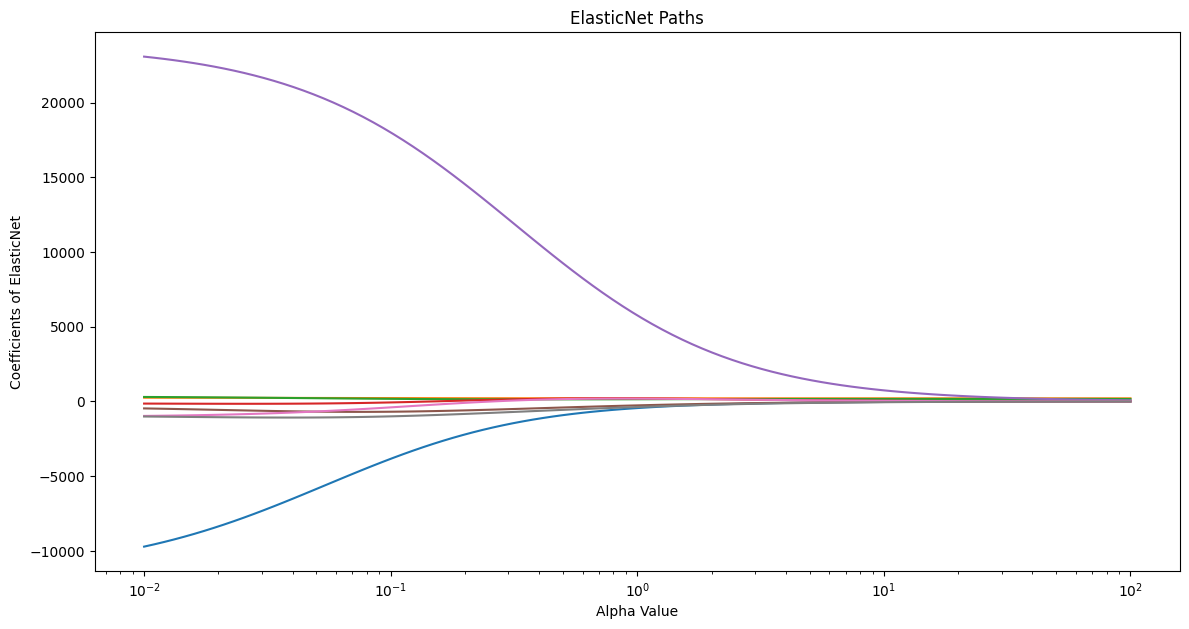

In [ ]:
# Create and train ElasticNet model
from sklearn.linear_model import ElasticNet

# Define the model
ElasticNet_model = ElasticNet()

# Train the model
ElasticNet_model.fit(X_new, y_new)

# Output the coefficients from the ElasticNet model
print("ElasticNet model coefficients:")
for i, name in enumerate(['intercept'] + data.drop("charges", axis=1).columns.tolist()):
    print(f"{name}: {ElasticNet_model.coef_[i]}")

print("\n")

# Initialize list to hold ElasticNet coefficients
elastic_coeffs = []

# For each alpha value, train ElasticNet model
for alpha in alpha_values:
    # Create ElasticNet model
    elastic = ElasticNet(alpha=alpha, fit_intercept=False)

    # Train the model
    elastic.fit(X_new, y_new)

    # Append coefficients
    elastic_coeffs.append(elastic.coef_)

# Plot ElasticNet paths
plt.figure(figsize=(14, 7))
plt.plot(alpha_values, elastic_coeffs)
plt.xscale('log')
plt.title('ElasticNet Paths')
plt.xlabel('Alpha Value')
plt.ylabel('Coefficients of ElasticNet')
plt.axis('tight')
plt.show()
